(306, 4)


/Users/b1acky/PycharmProjects/ISnT_lab2/lab/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/b1acky/PycharmProjects/ISnT_lab2/lab/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(305, 2)


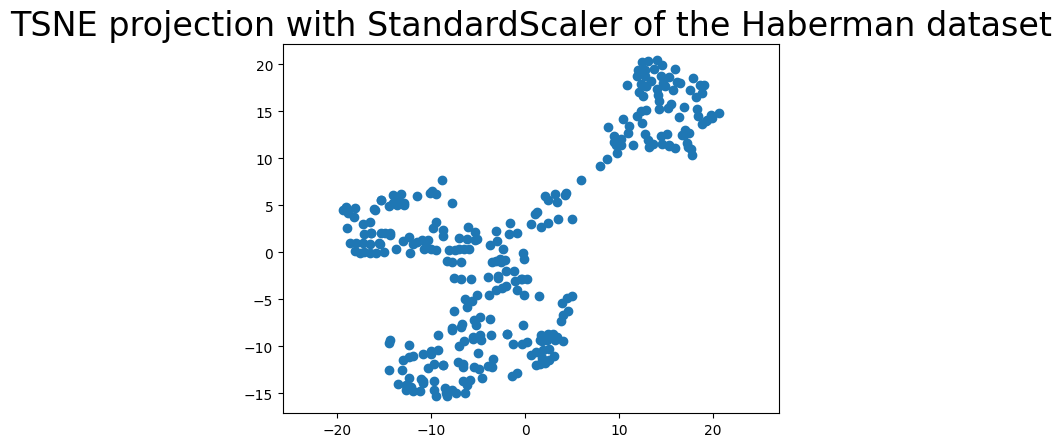

/Users/b1acky/PycharmProjects/ISnT_lab2/lab/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/b1acky/PycharmProjects/ISnT_lab2/lab/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(305, 2)


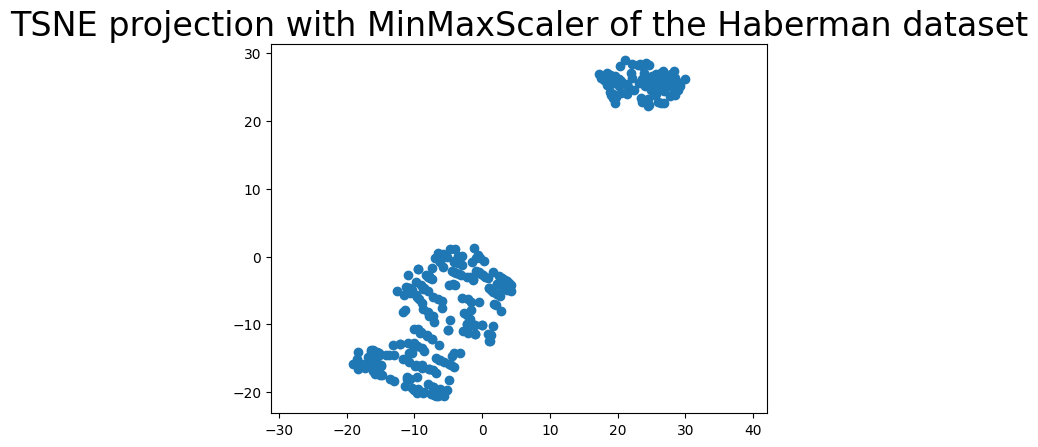

/Users/b1acky/PycharmProjects/ISnT_lab2/lab/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/b1acky/PycharmProjects/ISnT_lab2/lab/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(305, 2)


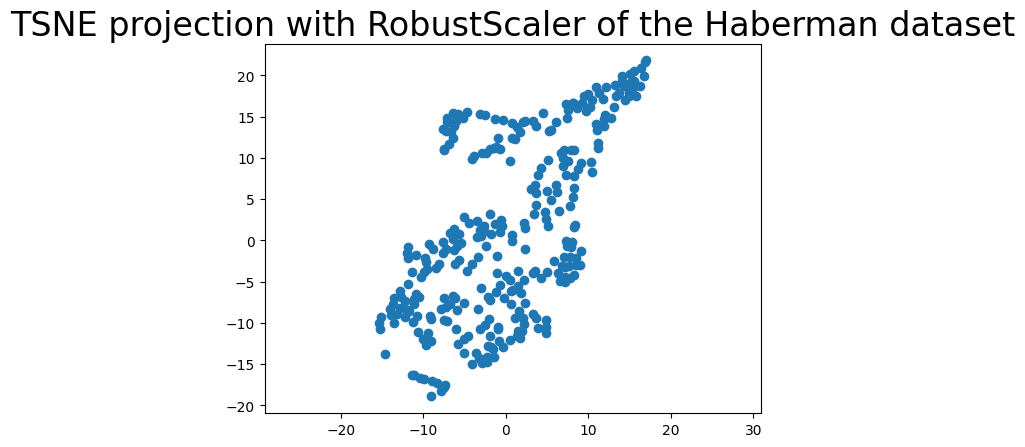

(305, 2)


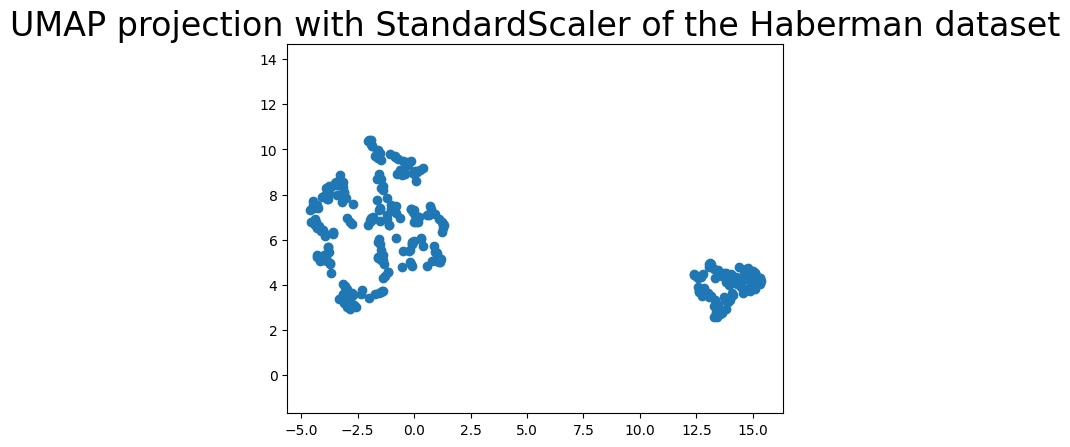

(305, 2)


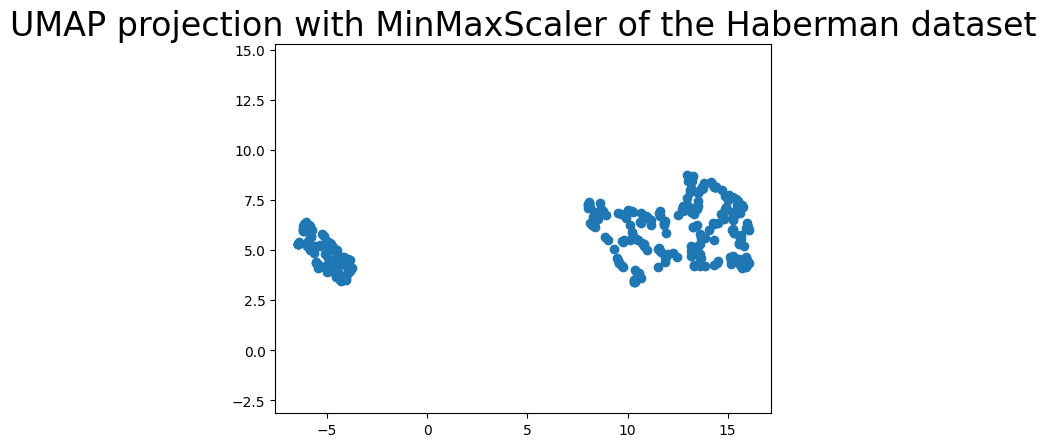

(305, 2)


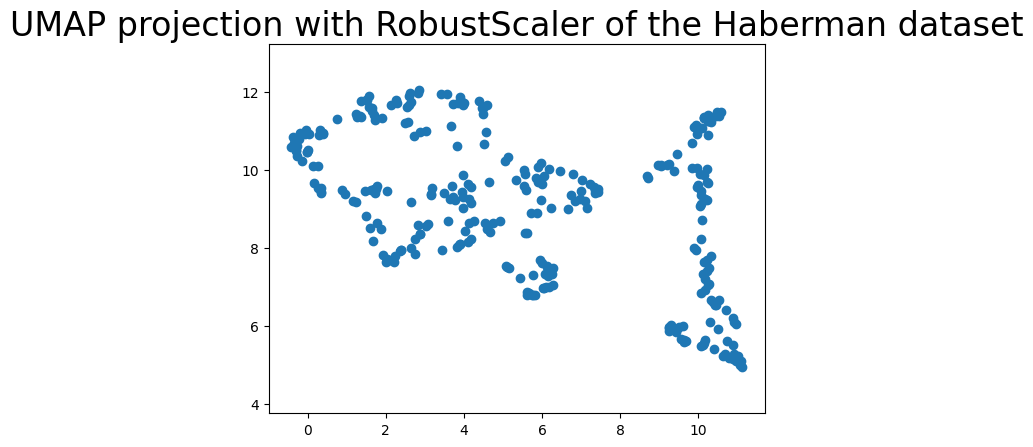

In [1]:
import pandas as pd # для манипулирования данными
import numpy as np

# Визуализация
import plotly.express as px # для визуализации данных
import matplotlib.pyplot as plt # для отображения рукописных цифр

# Sklearn
from sklearn import *
from sklearn.datasets import * # для данных MNIST
from sklearn.manifold import TSNE # для снижения размерности с помощью t-SNE

from umap import *


def pltWithScaler(rawData, ScalerName, reducer):
    scaled_data = ScalerName().fit_transform(rawData)
    embedded = reducer.fit_transform(scaled_data)
    print(embedded.shape)
    plt.scatter(
        embedded[:, 0],
        embedded[:, 1]
        # c=[sns.color_palette()[x] for x in tps.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
    )
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(f'{reducer.__class__.__name__} projection with {ScalerName.__name__} of the Haberman dataset', fontsize=24)
    plt.show()

#reducerUMAP = UMAP(n_jobs=-1)

# pltWithScaler(data, preprocessing.StandardScaler, reducerUMAP)
# pltWithScaler(data, preprocessing.MinMaxScaler, reducerUMAP)
# pltWithScaler(data, preprocessing.RobustScaler, reducerUMAP)

if __name__ == "__main__":
    data = []
    with open("haberman.csv", "r") as file:
        file.readline()
        data = np.loadtxt(file, delimiter=",")

    print(data.shape)
    data = pd.DataFrame(data)
    data = data.drop([0])
    reducerTSNE = TSNE(n_jobs=-1,
                       # значение по умолчанию=None. Количество параллельных заданий для поиска соседей. -1 означает использование всех процессоров.
                       )
    reducerUMAP = UMAP(n_jobs=-1)
    pltWithScaler(data, preprocessing.StandardScaler, reducerTSNE)
    pltWithScaler(data, preprocessing.MinMaxScaler, reducerTSNE)
    pltWithScaler(data, preprocessing.RobustScaler, reducerTSNE)

    pltWithScaler(data, preprocessing.StandardScaler, reducerUMAP)
    pltWithScaler(data, preprocessing.MinMaxScaler, reducerUMAP)
    pltWithScaler(data, preprocessing.RobustScaler, reducerUMAP)